### Project Statement:
The objective of this project is to explore and analyze the content available on Netflix, one of the largest video streaming platforms in the world. By examining various aspects such as content type (movies vs TV shows), production trends over the years, country-wise content distribution, and audience-targeted ratings, we aim to uncover key insights about Netflix's global content offerings.

The analysis will also focus on understanding trends in content production over the last decade and comparing movie and TV show distribution across different countries. Additionally, we will analyze the distribution of age ratings to understand how Netflix caters to different audience groups.

#### Key questions we will address:

1. What is the distribution of content types (movies vs TV shows) on Netflix?
2. How has the volume of content evolved over the last decade?
3. Which countries produce the most content on Netflix?
4. How does Netflix classify its content based on audience age ratings?
5. What are the most frequent genres on Netflix?
6. Which directors have directed the most content on Netflix?
7. What is the distribution of movie durations and TV show seasons on Netflix?
8. What is the proportion of content added to Netflix in the last 5 years?
9. Which months have the highest content additions on Netflix?

#### Dataset Details:
The Netflix dataset contains information about the various titles available on Netflix as of 2021. The dataset includes movies and TV shows, along with key details such as release year, cast, director, country, and age rating.

#### Missing Data Handling:
Several columns, such as director, cast, country, and date_added, contain missing values. For the purpose of analysis, missing values will be filled with "Unknown" to ensure that the dataset remains complete.

#### Data Source:
The Netflix dataset can be sourced from Kaggle's publicly available datasets, which contain details of Netflix content up to 2021.



### 1. What is the distribution of content types (movies vs TV shows) on Netflix?

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Netflix dataset
df_netflix = pd.read_csv("netflix_titles.csv")

# Fill missing values in key columns
df_netflix.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'date_added': 'Unknown'
}, inplace=True)


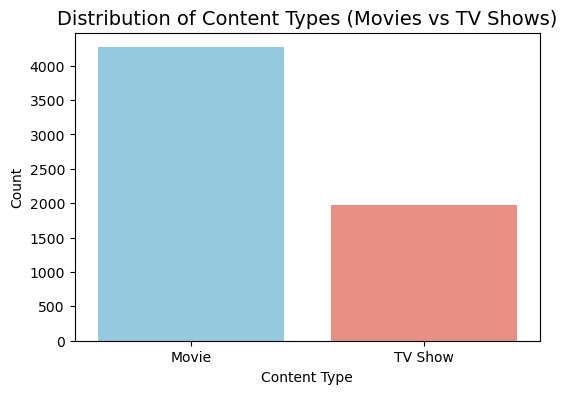

In [ ]:
# Visualize content types (Movies vs TV Shows)
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df_netflix, hue='type', palette=['skyblue', 'salmon'], legend=False)
plt.title('Distribution of Content Types (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


### 2. How has the volume of content evolved over the last decade?

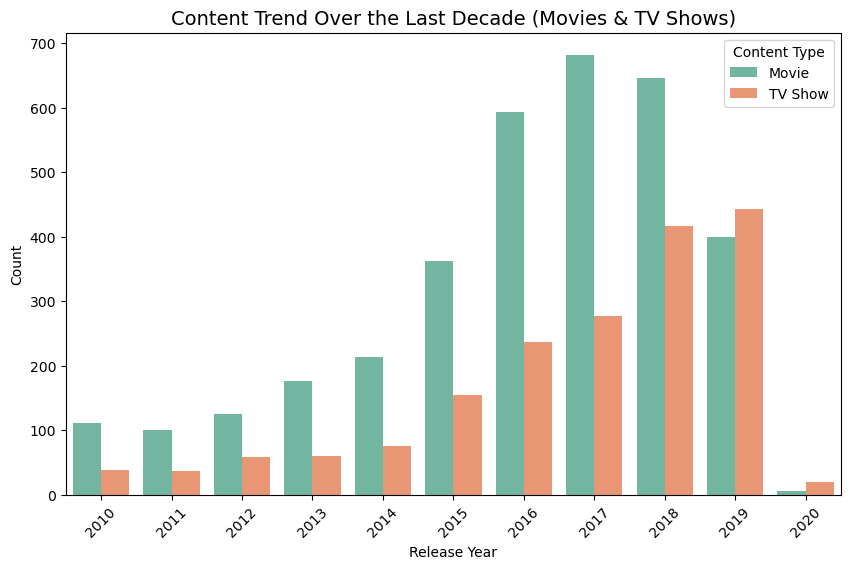

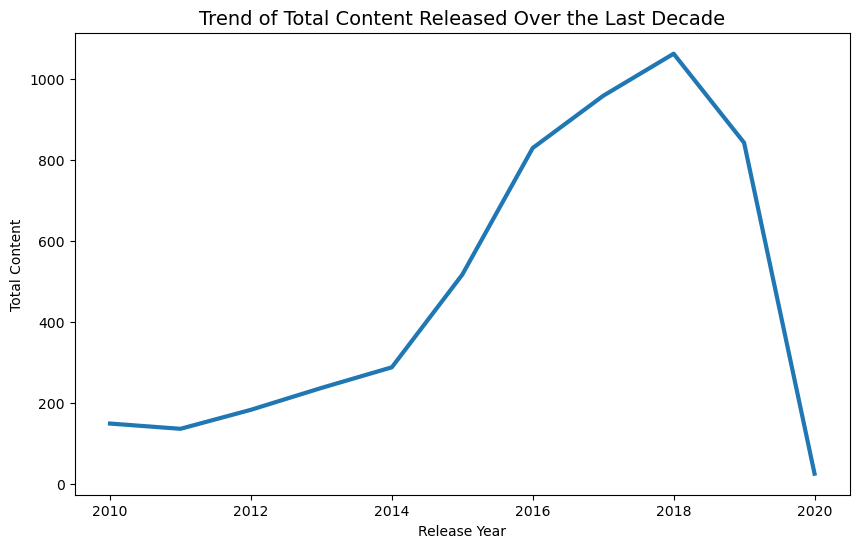

In [ ]:
# Filter for content released in the last decade (since 2010)
df_decade = df_netflix[df_netflix['release_year'] >= 2010]

# Plot the trend of content type over the last decade
plt.figure(figsize=(10, 6))
sns.countplot(x='release_year', hue='type', data=df_decade, palette='Set2')
plt.title('Content Trend Over the Last Decade (Movies & TV Shows)', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()

# Create a line plot showing the total content produced each year
last_decade_df = df_decade.groupby('release_year')['type'].size().reset_index(name='Total Content')
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='Total Content', data=last_decade_df, linewidth=3)
plt.title('Trend of Total Content Released Over the Last Decade', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Total Content')
plt.show()


### 3. Which countries produce the most content on Netflix?

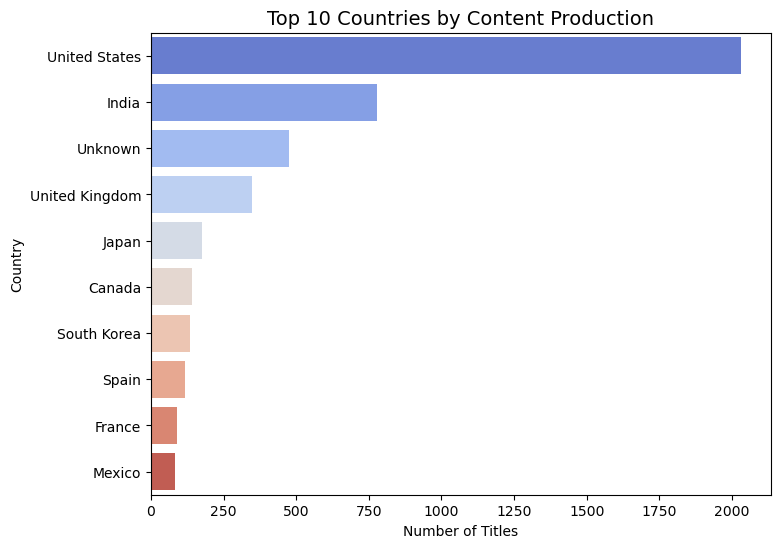

In [ ]:
# Top 10 countries by content production
top_countries = df_netflix['country'].value_counts().nlargest(10)

# Visualize top 10 countries by content production
plt.figure(figsize=(8, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='coolwarm', dodge=False, legend=False)
plt.title('Top 10 Countries by Content Production', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


### 4. How does Netflix classify its content based on audience age ratings?

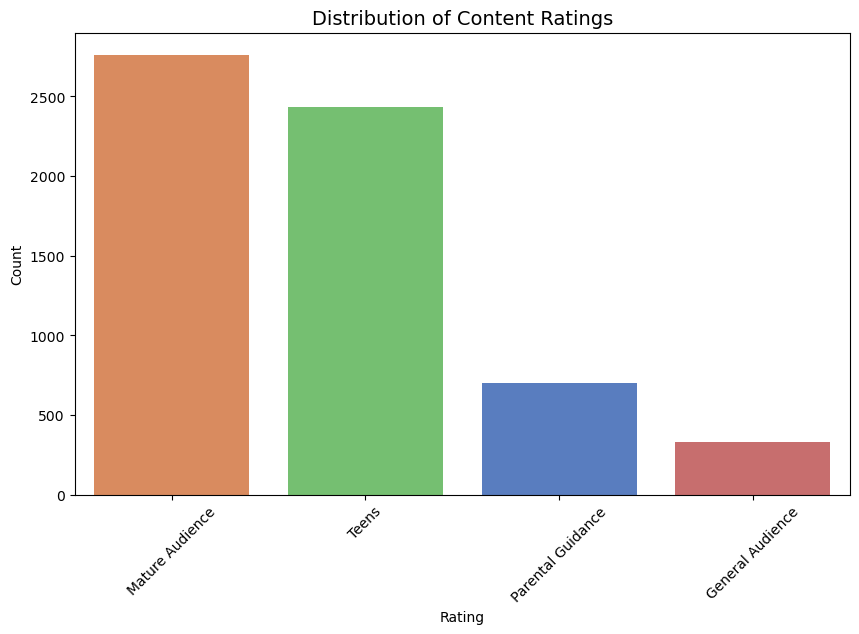

In [ ]:
# Map rating categories to simplified groups
rating_map = {
    'TV-PG': 'Parental Guidance',
    'TV-MA': 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}
df_netflix['rating'] = df_netflix['rating'].replace(rating_map)

# Visualize the distribution of age rating categories
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_netflix, hue='rating', palette='muted', legend=False, order=df_netflix['rating'].value_counts().index)
plt.title('Distribution of Content Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### 5. What are the most frequent genres on Netflix?

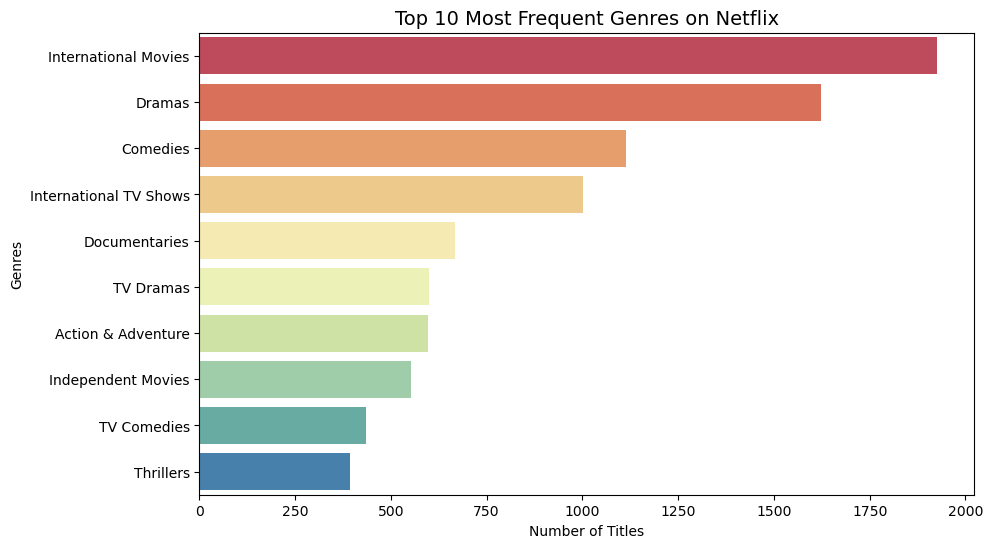

In [ ]:
# Split the 'listed_in' column into multiple genres
df_netflix['genres'] = df_netflix['listed_in'].str.split(', ')

# Count the frequency of each genre
genre_list = df_netflix['genres'].explode().value_counts().nlargest(10)

# Plot the top 10 most frequent genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_list.values, y=genre_list.index, hue=genre_list.index, palette='Spectral', dodge=False, legend=False)
plt.title('Top 10 Most Frequent Genres on Netflix', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()


### 6. Which directors have directed the most content on Netflix?

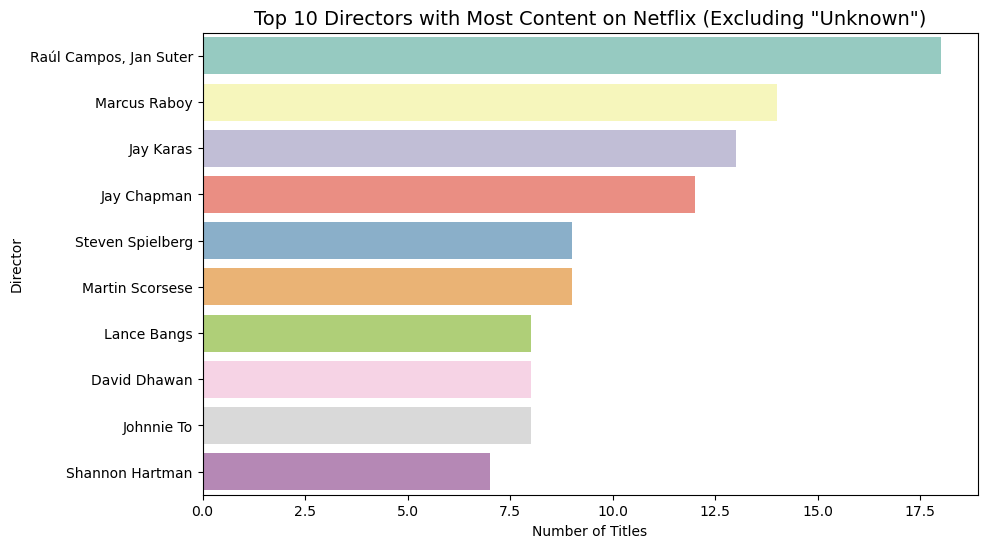

In [ ]:
# Count the top 10 directors with the most content, excluding "Unknown"
top_directors = df_netflix[df_netflix['director'] != 'Unknown']['director'].value_counts().nlargest(10)

# Create a DataFrame for the top directors to use with the hue parameter
top_directors_df = pd.DataFrame({'Director': top_directors.index, 'Titles': top_directors.values})

# Plot the top 10 directors, excluding "Unknown"
plt.figure(figsize=(10, 6))
sns.barplot(x='Titles', y='Director', data=top_directors_df, hue='Director', palette='Set3', dodge=False, legend=False)
plt.title('Top 10 Directors with Most Content on Netflix (Excluding "Unknown")', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


### 7. What is the distribution of movie durations and TV show seasons on Netflix?


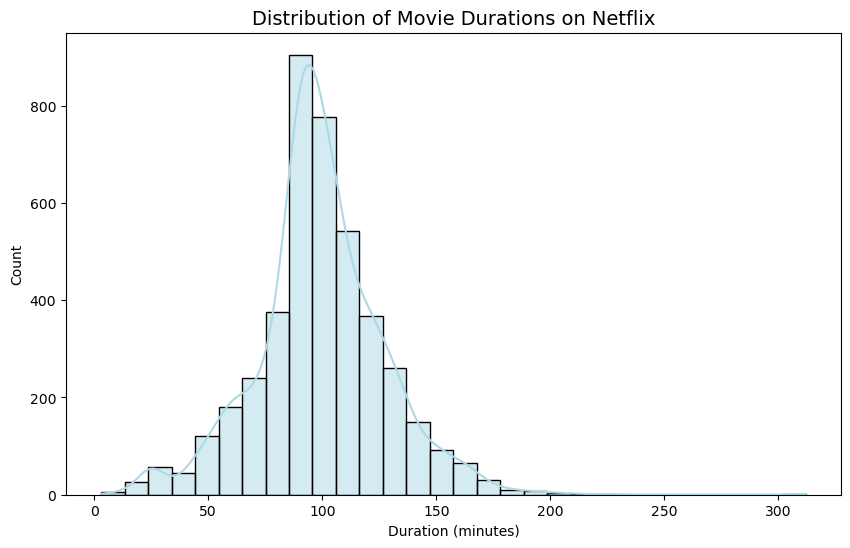

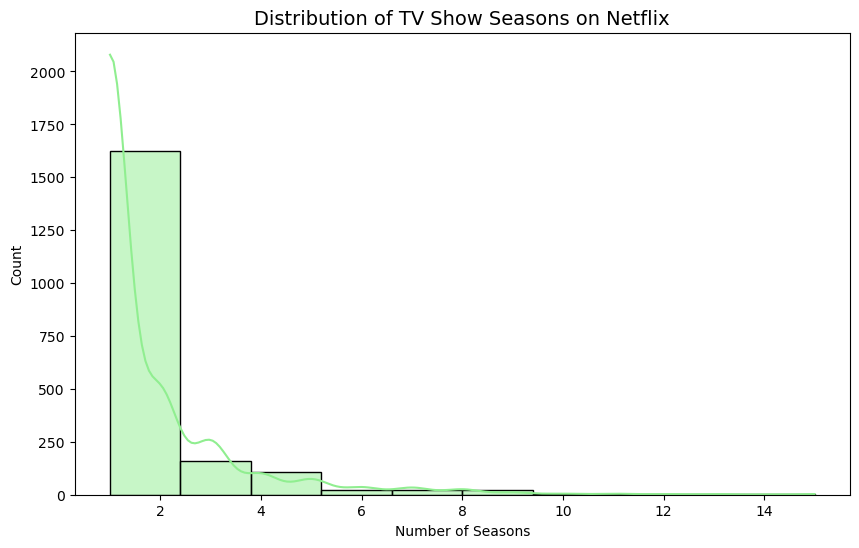

In [ ]:
# Split the dataset by type (movies and TV shows)
df_movies = df_netflix[df_netflix['type'] == 'Movie'].copy()
df_tvshows = df_netflix[df_netflix['type'] == 'TV Show'].copy()

# Convert duration column for movies to numeric (movie runtime in minutes)
df_movies['duration'] = df_movies['duration'].str.replace(' min', '', regex=False)
df_movies['duration'] = pd.to_numeric(df_movies['duration'], errors='coerce')  # Convert to numeric and handle errors

# Extract the number of seasons for TV shows
df_tvshows['seasons'] = df_tvshows['duration'].str.extract(r'(\d+)').astype(float)  # Using raw string (r'...') for regex

# Drop any rows with missing durations (optional, if you want to ensure clean data)
df_movies.dropna(subset=['duration'], inplace=True)
df_tvshows.dropna(subset=['seasons'], inplace=True)

# Plot the distribution of movie durations
plt.figure(figsize=(10, 6))
sns.histplot(df_movies['duration'], bins=30, kde=True, color='lightblue')
plt.title('Distribution of Movie Durations on Netflix', fontsize=14)
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Plot the distribution of TV show seasons
plt.figure(figsize=(10, 6))
sns.histplot(df_tvshows['seasons'], bins=10, kde=True, color='lightgreen')
plt.title('Distribution of TV Show Seasons on Netflix', fontsize=14)
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()


### 8. What is the proportion of content added to Netflix in the last 5 years?

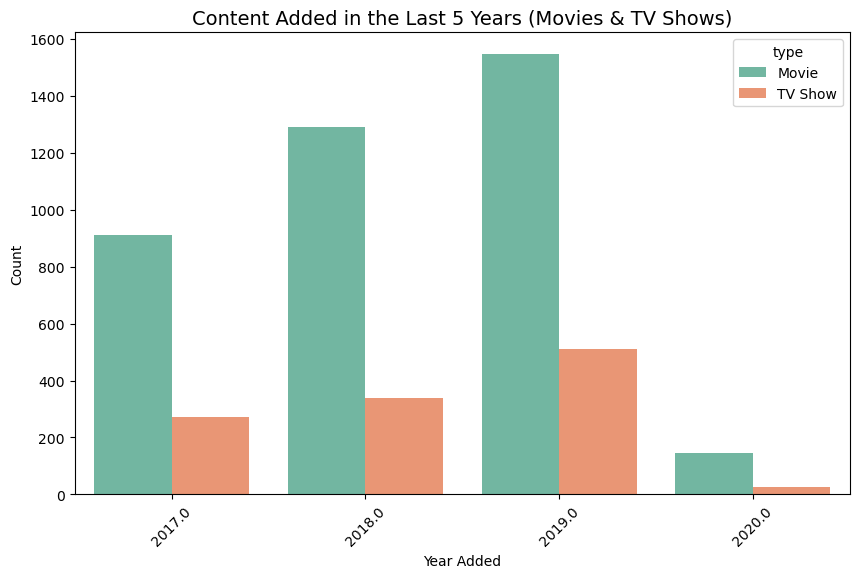

In [ ]:
# Convert 'date_added' to datetime format and extract the year
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], errors='coerce')
df_netflix['year_added'] = df_netflix['date_added'].dt.year

# Filter content added in the last 5 years
last_5_years = df_netflix[df_netflix['year_added'] >= 2017]

# Plot the proportion of content added in the last 5 years
plt.figure(figsize=(10, 6))
sns.countplot(x='year_added', hue='type', data=last_5_years, palette='Set2')
plt.title('Content Added in the Last 5 Years (Movies & TV Shows)', fontsize=14)
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### 9. Which months have the highest content additions?

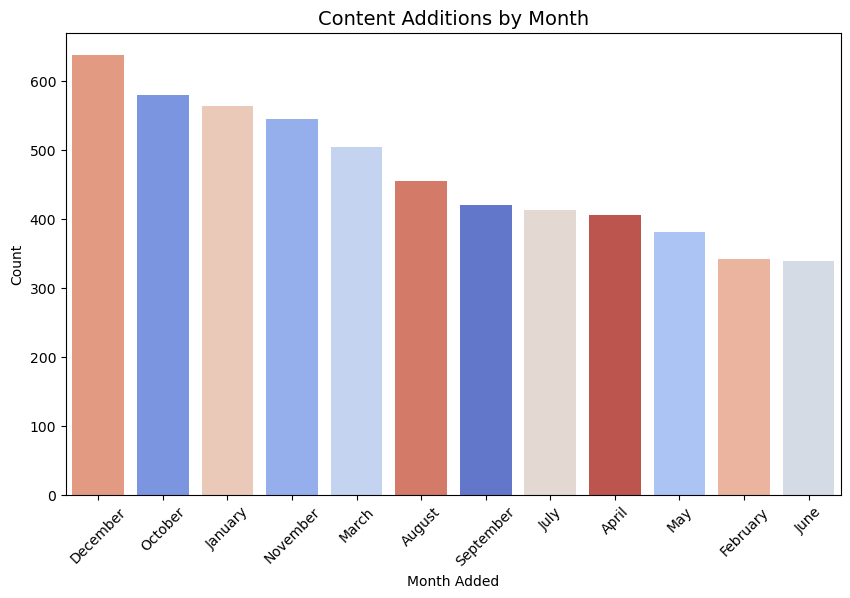

In [ ]:
# Extract the month when content was added
df_netflix['month_added'] = df_netflix['date_added'].dt.month_name()

# Plot the distribution of content additions by month
plt.figure(figsize=(10, 6))
sns.countplot(x='month_added', hue='month_added', data=df_netflix,
              order=df_netflix['month_added'].value_counts().index,
              palette='coolwarm', legend=False)
plt.title('Content Additions by Month', fontsize=14)
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
